In [5]:
%load_ext autoreload
%autoreload 2

%load_ext dotenv
%dotenv src/.env

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [6]:
import os
os.chdir('/Users/kushagrasharma/coding/hormozlab/src')

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
DATA_DIR = '/Users/kushagrasharma/coding/hormozlab/data/'

In [8]:
train_full = pd.read_csv(DATA_DIR + 'scvi_train_set_gapdh.csv', header=None).to_numpy()
train_umap = pd.read_csv(DATA_DIR + 'train_coords.csv', header=None).to_numpy()

Standard KNN graph construction methods use $K=\sqrt{N}$ where $N$ is the number of samples / data points. We naively began with this setting, but found that this was likely too high considering the structure of the data. Below, we draw the UMAPd representation of the data in two settings - the first connects each cell and its nearest neighbor, and the second connects each cell and its farthest neighbor to which it shared an edge in the symmetric KNNG with $K=\sqrt{N}$. 

<img src="figures/closest_umap_sqrt_N_knng.png" alt="closest" width="300"/>
<img src="figures/farthest_umap_sqrt_N_knng.png" alt="farthest" width="300"/>

We see in the above visualization that the farthest neighbor is quite far in UMAP space, indicating that we're using too high a setting for $K$. 

The UMAP dimensionality reduction method itself constructs such a graph, and uses $K=15$ as its standard. UMAP is a standard dimensionality reduction method for single cell sequencing data, so we chose to follow its standard. Below is the same figure for the farthest cell with $K=15$ (the closest cell is the same). 

Since the UMAP method uses as an intermediate product a graph representation of the data, and is a well accepted visualization method for single cell data, we can compare the distribution of certain marker genes (genes that have a spatial pattern in UMAPd data as well as biological significance in differentiating between cell types in the bone marrow) between the original UMAP representation and our computed graph. 

Below are the marker genes we chose to plot, by cell type. 

| Cell Type     | Marker Gene |
|---------------|-------------|
| Erythroid     | CA1         |
| Megakaryocyte | ITGA2B      |
| HSC/MPP       | CRHBP       |

In [11]:
custom_umap = np.load(DATA_DIR + "umapWithCustomGraph.npy")
gene_indexes = [4514, 8130, 2785]

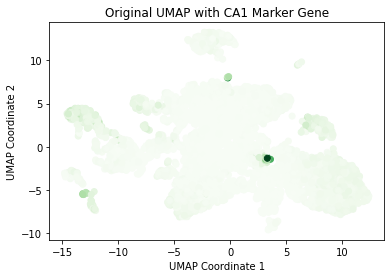

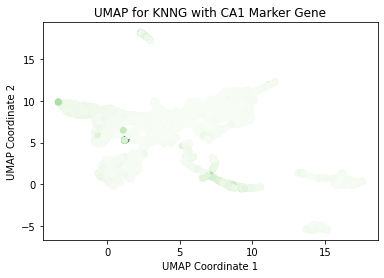

In [23]:
i = 0

gene_data = train_full[:, gene_indexes[i]]

plt.scatter(train_umap[:,0], train_umap[:,1], c=gene_data, cmap='Greens')
plt.title('Original UMAP with CA1 Marker Gene')
plt.xlabel('UMAP Coordinate 1')
plt.ylabel('UMAP Coordinate 2')

plt.show()

plt.scatter(custom_umap[:,0], custom_umap[:,1], c=gene_data, cmap='Greens')
plt.title('UMAP for KNNG with CA1 Marker Gene')
plt.xlabel('UMAP Coordinate 1')
plt.ylabel('UMAP Coordinate 2')

plt.show()

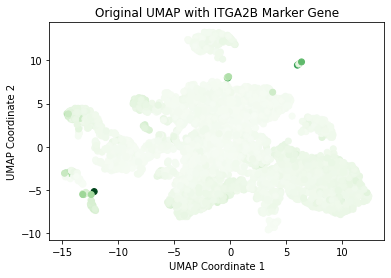

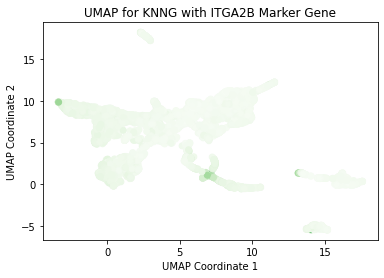

In [24]:
i = 1

gene_data = train_full[:, gene_indexes[i]]

plt.scatter(train_umap[:,0], train_umap[:,1], c=gene_data, cmap='Greens')
plt.title('Original UMAP with ITGA2B Marker Gene')
plt.xlabel('UMAP Coordinate 1')
plt.ylabel('UMAP Coordinate 2')

plt.show()

plt.scatter(custom_umap[:,0], custom_umap[:,1], c=gene_data, cmap='Greens')
plt.title('UMAP for KNNG with ITGA2B Marker Gene')
plt.xlabel('UMAP Coordinate 1')
plt.ylabel('UMAP Coordinate 2')

plt.show()

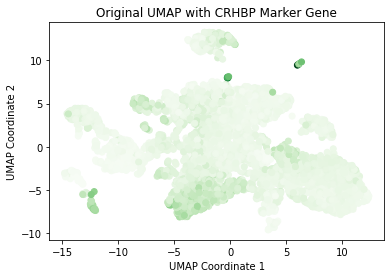

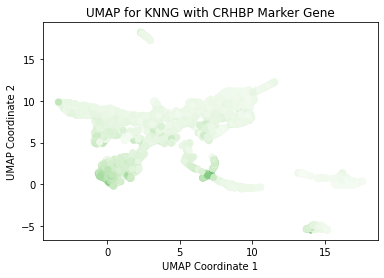

In [25]:
i = 2

gene_data = train_full[:, gene_indexes[i]]

plt.scatter(train_umap[:,0], train_umap[:,1], c=gene_data, cmap='Greens')
plt.title('Original UMAP with CRHBP Marker Gene')
plt.xlabel('UMAP Coordinate 1')
plt.ylabel('UMAP Coordinate 2')

plt.show()

plt.scatter(custom_umap[:,0], custom_umap[:,1], c=gene_data, cmap='Greens')
plt.title('UMAP for KNNG with CRHBP Marker Gene')
plt.xlabel('UMAP Coordinate 1')
plt.ylabel('UMAP Coordinate 2')

plt.show()

Our graphs maintain the key required properties for these marker genes - localization.